In [1]:
import numpy as np
import scipy
from scipy import stats

In [2]:
# !unzip PA12\ -\ Student\ Data.zip

In [5]:
n = 50
cloud = 50*np.random.rand(3, n)
# print(cloud)

T = 50*np.random.rand(3, 1)
# print(T)

R = stats.special_ortho_group.rvs(3)
# print(R)
# print(np.linalg.det(R))

N = np.random.rand(3, n)
# print(N)

tran = R @ (cloud - get_centroid(cloud)) + (T + get_centroid(cloud)) + N
# print(tran)

In [4]:
def get_centroid(points):
    return np.mean(points, 1, keepdims=True)

def get_H(p, tran_p):
    p_1 = p - get_centroid(p)
    tran_p_1 = tran_p - get_centroid(tran_p)
    H = p_1 @ tran_p_1.T
    return H

def get_R_hat(p, tran_p):
    H = get_H(p, tran_p)
    U, S, VT = scipy.linalg.svd(H)
    R_hat = (U @ VT).T
    
    # correction if resulting matrix is a reflection
    if np.linalg.det(R_hat) < 0:
        VT[2] = -VT[2]
        R_hat = (U @ VT).T
    
    return R_hat

def get_T_hat(p, tran_p):
    p_c = get_centroid(p)
    tran_p_c = get_centroid(tran_p)
    T_hat = tran_p_c - p_c
    return T_hat

def get_Registration(p, tran_p):
    R_hat = get_R_hat(p, tran_p)
    T_hat = get_T_hat(p, tran_p)
    
    F_D = np.concatenate((R_hat, T_hat), 1)
    F_D = np.concatenate((F_D, np.array([[0,0,0,1]])))
    
    return F_D

In [6]:
print(cloud)

# R_hat, T_hat = get_Registration(cloud, tran)
# tran_hat = R_hat @ (cloud - get_centroid(cloud)) + (T_hat + get_centroid(cloud))
# print(R)
# print(R_hat)
# print(T_hat)
# diff = (tran_hat - tran)**2

# print(diff.sum())

[[26.6893128  15.37006054 47.60151555 18.06108211 22.44790463 47.93448837
   8.25574018 29.52625819 29.23275066 19.55606473 44.12228205  8.77197004
   6.22964065 37.72304018 39.9766792  17.87431623 17.99086938 37.50339564
  26.04756228 13.60996636 21.92605418 34.90933328  7.61595295 10.17928514
  37.27260161 35.91857634 28.63316847 47.13238051  1.51526988 23.23269874
  35.23364206 14.19734763 44.13021396  4.94168421 26.61584368 20.16069628
  13.9486068  17.40451859 15.63157772 32.06712797 19.07385878  1.52959095
  21.0449104  35.015449   27.69246506  4.30514365 45.73039882 21.11143391
  49.43644064 31.5865518 ]
 [ 1.77792588  5.16352905 18.80870835 43.13842977 10.00680376 22.10687934
  27.24201725 28.82142505 47.63910829 22.95647496  3.80363942 13.36111556
  16.36105522 40.32256269 41.42706216 19.69777997 18.90677557 25.28788486
  10.8391165  30.22428891 49.23018536  3.10745193 48.11406154 38.87717089
  15.499287   23.72008221 23.46076366 14.99490505 41.14764071 12.69799221
  42.779103

In [7]:
import pandas as pd
import numpy as np

def calbody_data(filepath):
    data = pd.read_csv(filepath, header=None,names=["x", "y", "z", np.nan])
    N_D = int(data["x"][0])
    N_A = int(data["y"][0])
    N_C = int(data["z"][0])

    d = np.array(data[["x", "y", "z"]][1:1 + N_D])
    a = np.array(data[["x", "y", "z"]][1 + N_D : 1 + N_D + N_A])
    c = np.array(data[["x", "y", "z"]][1 + N_D + N_A :])
    return d, a, c

def calreading_data(filepath):
    '''
        Takes a filepath
        
        Returns 3 arrays:
            first array consists of of N_frames frames, each frame containing N_D measurements
            second array consists of of N_frames frames, each frame containing N_A measurements
            third array consists of of N_frames frames, each frame containing N_C measurements
    '''
    size = pd.read_csv(filepath, header=None,names=["D", "A", "C", "Frame", np.nan], nrows = 1)
    N_D = int(size["D"][0])
    N_A = int(size["A"][0])
    N_C = int(size["C"][0])
    N_Frames = int(size["Frame"][0])
    
    data = pd.read_csv(filepath, header=None,names=["x", "y", "z"], skiprows = [0])
    data = np.array(data[["x", "y", "z"]])
    by_frame = np.reshape(data, (N_Frames, N_D + N_A + N_C, 3))
    
    d = by_frame[:, :N_D]
    a = by_frame[:, N_D:N_D+N_A]
    c = by_frame[:, N_D+N_A:]

    return d, a, c


def empivot_data(filepath):
    '''
        Takes a filepath
        
        Returns an array of N_frames frames, each fram containing N_G measurements
    '''
    size = pd.read_csv(filepath, header=None,names=["G", "Frame", np.nan], nrows = 1)
    N_G = int(size["G"][0])
    N_Frames = int(size["Frame"][0])
    
    data = pd.read_csv(filepath, header=None,names=["x", "y", "z"], skiprows = [0])
    g = np.array(data[["x", "y", "z"]])
    g = np.reshape(g, (N_Frames, N_G, 3))
    
    return g

def optpivot_data(filepath):
    '''
        Takes a filepath
        
        Returns 2 arrays:
            first array consists of of N_frames frames, each frame containing N_D measurements
            second array consists of of N_frames frames, each frame containing N_H measurements
    '''
    size = pd.read_csv(filepath, header=None,names=["D", "H", "Frame", np.nan], nrows = 1)
    N_D = int(size["D"][0])
    N_H = int(size["H"][0])
    N_Frames = int(size["Frame"][0])
    
    data = pd.read_csv(filepath, header=None,names=["x", "y", "z"], skiprows = [0])
    data = np.array(data[["x", "y", "z"]])
    by_frame = np.reshape(data, (N_Frames, N_D + N_H, 3))
    
    d = by_frame[:, :N_D]
    h = by_frame[:, N_D:]

    return d, h

In [16]:
# HW Number 1


D, A, C = calreading_data("./programs/data/pa2-debug-d-calreadings.txt")
d, a, c = calbody_data("./programs/data/pa2-debug-d-calbody.txt")


a_c = a.T - get_centroid(a.T)
c_c = c.T - get_centroid(c.T)
c_homo = np.concatenate((c_c, np.ones((1, c_c.shape[1]))))

C_expect = []

for i in range(D.shape[0]):
    F_D = get_Registration(d.T, D[i].T)
    F_A = get_Registration(a_c, A[i].T)
    C_hat = np.linalg.inv(F_D) @ F_A @ c_homo
    C_expect.append(C_hat[:3].T)
    

C_expect = np.array(C_expect)
N_frames, N_C, _ = C_expect.shape
C_expect = np.reshape(C_expect, (N_frames * N_C, 3))
C_obs = np.reshape(C, (N_frames * N_C, 3))

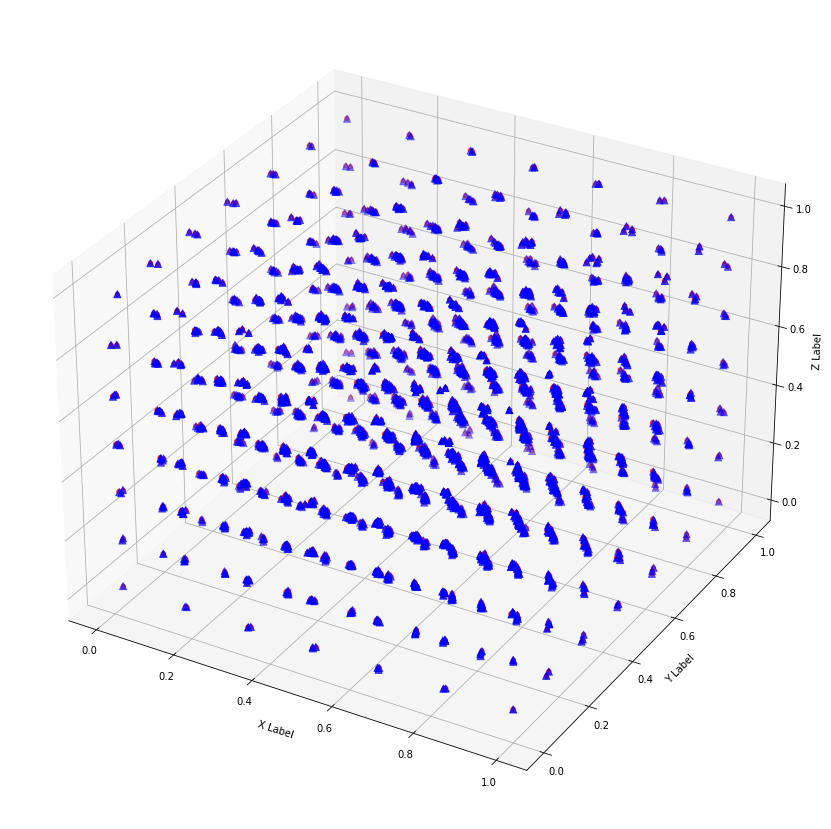

In [17]:
import matplotlib.pyplot as plt
c_x = C_obs.copy()
c_y = C_expect.copy()


minc = np.amin(C_obs, 0)
lenc = np.amax(C_obs, 0) - np.amin(C_obs, 0)

C_obs = (C_obs - minc) / lenc
C_expect = (C_expect - minc) / lenc


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(C_expect[:,0], C_expect[:,1], C_expect[:,2], marker='o', color='r')
ax.scatter(C_obs[:,0], C_obs[:,1], C_obs[:,2], marker='^', color='b', s=50)

# C_t = C_expect[C_expect[:, 0] > 6/7 ]
# plt.scatter(np.arange(C_expect.shape[0]), C_expect[:,1])
# ax.scatter(C_t[:,0], C_t[:,1], C_t[:,2], marker='^', color='b', s=50)
# ax.scatter(0, 0, 0, marker='^', color='b', s=50)
# ax.scatter(1, 1, 1, marker='^', color='b', s=50)




ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()



# print(C_expect[0])
# print(c)

(3375, 45)


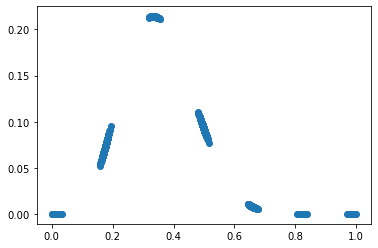

In [18]:
def B(x, n, v):
    return scipy.special.comb(n, v) * x**v * (1-x)**(n-v)


def getbasis(p, n):
    l = []
    for i in range(p.shape[1]):
        for v in range(n):
            l.append(B(p[:,i], n, v))
    l = np.array(l)
    return l.T


n = 15


l = getbasis(C_obs, n)
print(l.shape)

i = 0
# for v in range(n):
plt.scatter(C_obs[:,i], l[:,5+i*n])
# plt.scatter(C_obs[:,i], l[:,1+i*4])
# plt.scatter(C_obs[:,i], l[:,2+i*4])
# plt.scatter(C_obs[:,i], l[:,3+i*4])

# m = np.array([B(d, 3, 0), B(d, 3, 1), B(d, 3, 2), B(d, 3, 3), ])
# print(m)

In [19]:
def getcoeff(obs, expect, n):
    l = getbasis(obs, n)
    coeff = []
    for i in range(3):
        f = np.linalg.lstsq(l, expect[:,i] - obs[:,i])[0]
        coeff.append(f)
    return np.array(coeff)


def undist(coeff, coords):
    basis = getbasis(coords, 20)
    x_und = (coeff[0] * basis).sum(axis=1)
    y_und = (coeff[1] * basis).sum(axis=1)
    z_und = (coeff[2] * basis).sum(axis=1)
    
    coord_und = np.array([x_und, y_und, z_und]).T
    return coord_und

coeff = getcoeff(C_obs, C_expect, 20)
und = undist(coeff, C_obs)
und = und*lenc
# print(und)
# print(c_x)

print("Corrected: ",np.sqrt(((c_y - c_x - und)**2).sum() / c_y.shape[0]))
print("Original: ", np.sqrt(((c_y - c_x)**2).sum() / c_y.shape[0]))
# print(und)

Corrected:  1.0315625448987211
Original:  1.0560426802685938


C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """
